In [233]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [234]:
dataset = pd.read_csv("dataset/DATA_copy_columndevided.csv")

In [235]:
dataset.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [236]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [237]:
print(len(dataset.columns))

33


In [238]:
dataset.dtypes

STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object

In [239]:
import matplotlib.pyplot as plt

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [241]:
X = dataset1.iloc[:, 1:32].values
y = dataset1.iloc[:, 32].values

In [242]:
X

array([[2, 2, 3, ..., 1, 1, 1],
       [2, 2, 3, ..., 2, 3, 1],
       [2, 2, 2, ..., 2, 2, 1],
       ...,
       [1, 1, 1, ..., 4, 3, 9],
       [2, 1, 2, ..., 5, 3, 9],
       [1, 1, 1, ..., 5, 4, 9]], dtype=int64)

In [243]:
dataset

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [244]:
y

array([1, 1, 1, 1, 1, 2, 5, 2, 5, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 3, 1, 1,
       3, 1, 2, 3, 1, 1, 3, 5, 5, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 4,
       1, 3, 5, 3, 1, 2, 1, 4, 1, 5, 3, 3, 5, 4, 3, 5, 2, 5, 3, 5, 3, 2,
       5, 1, 5, 5, 7, 6, 6, 6, 7, 7, 4, 7, 4, 3, 4, 3, 7, 7, 7, 4, 5, 6,
       6, 6, 6, 6, 7, 4, 6, 5, 7, 6, 7, 7, 6, 7, 7, 7, 3, 7, 7, 6, 6, 7,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 3, 2, 3, 1, 0, 3, 1, 4,
       3, 3, 1, 2, 0, 2, 0, 0, 5, 5, 1, 4, 3], dtype=int64)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [246]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [248]:
y_predict = classifier.predict(X_test)

In [249]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test, y_predict))

[[0 1 2 0 0 0 0 0]
 [0 2 3 0 0 2 0 1]
 [0 1 0 0 0 0 0 0]
 [0 2 0 2 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 3 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0]
 [0 2 1 0 0 0 1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.17      0.25      0.20         8
           2       0.00      0.00      0.00         1
           3       0.67      0.50      0.57         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.33      0.50      0.40         2
           7       0.50      0.20      0.29         5

    accuracy                           0.21        29
   macro avg       0.21      0.18      0.18        29
weighted avg       0.25      0.21      0.21        29



C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\nethm\AppData\Local\Temp\ipykernel_7552\4271519678.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\nethm\AppData\Local\Temp\ipykernel_7552\4271519678.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


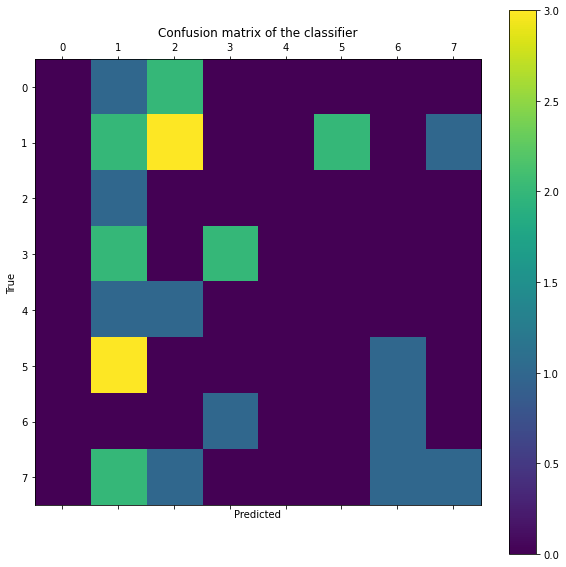

In [250]:
from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3', '4', '5', '6', '7']
cm = confusion_matrix(y_test, y_predict)
# print(cm)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [251]:
def get_metrics(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average='weighted')
    recall = recall_score(y_test, y_predict, average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predict)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 20.69% 
precision = 24.71% 
recall = 20.69% 
f1 = 21.08%


C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [252]:
import numpy as np

FP = confusion_matrix(y_test, y_predict).sum(axis=0) - np.diag(confusion_matrix(y_test, y_predict))  
FN = confusion_matrix(y_test, y_predict).sum(axis=1) - np.diag(confusion_matrix(y_test, y_predict)) 
TP = np.diag(confusion_matrix(y_test, y_predict)) 
TN = confusion_matrix(y_test, y_predict).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

C:\Users\nethm\AppData\Local\Temp\ipykernel_7552\2163862877.py:13: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
C:\Users\nethm\AppData\Local\Temp\ipykernel_7552\2163862877.py:21: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [253]:
TPR

array([0.  , 0.25, 0.  , 0.5 , 0.  , 0.  , 0.5 , 0.2 ])

In [254]:
FPR

array([0.        , 0.47619048, 0.25      , 0.04      , 0.        ,
       0.08      , 0.07407407, 0.04166667])

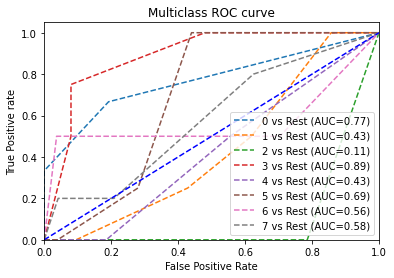

In [255]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_


# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB(alpha = 0.1)
# classifier.fit(x_train, y_train)

# y_pred = classifier.predict(x_test)
pred_prob = classifier.predict_proba(X_test)


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [256]:
data = dataset.loc[:,['1','2','3','4','6','17','18','19','20','21','22','23','24','25','26','27','28','29','30']]
data

,1,2,3,4,6,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2,2,3,3,2,3,2,2,1,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,2,2,2,2,1,1,1,1,1,3,2,3,2,2,3
2,2,2,2,3,2,2,1,2,1,1,1,1,1,2,2,1,1,2,2
3,1,1,1,3,2,3,1,2,1,1,1,1,2,3,2,2,1,3,2
4,2,2,1,3,2,2,1,1,1,1,1,2,1,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,3,3,2,1,1,1,1,1,2,1,2,1,3,3
141,1,1,2,4,2,3,2,2,2,1,2,1,1,3,2,2,1,5,3
142,1,1,1,4,2,2,2,2,1,1,1,1,1,3,3,2,1,4,3
143,2,1,2,4,1,2,2,1,1,1,1,2,1,2,1,2,1,5,3


In [257]:
X1 = data.iloc[:, 0:17].values
y1 = data.iloc[:, 18].values

In [258]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.20)

In [259]:
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [260]:
classifier = KNeighborsClassifier()
classifier.fit(X1_train,y1_train)

KNeighborsClassifier()

In [261]:
y1_predict = classifier.predict(X1_test)

In [262]:
print(confusion_matrix(y1_test,y1_predict))
print(classification_report(y1_test, y1_predict))

[[0 1 0 1]
 [1 1 7 0]
 [0 2 8 1]
 [0 2 2 3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.17      0.11      0.13         9
           3       0.47      0.73      0.57        11
           4       0.60      0.43      0.50         7

    accuracy                           0.41        29
   macro avg       0.31      0.32      0.30        29
weighted avg       0.38      0.41      0.38        29



C:\Users\nethm\AppData\Local\Temp\ipykernel_7552\4134086653.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\nethm\AppData\Local\Temp\ipykernel_7552\4134086653.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


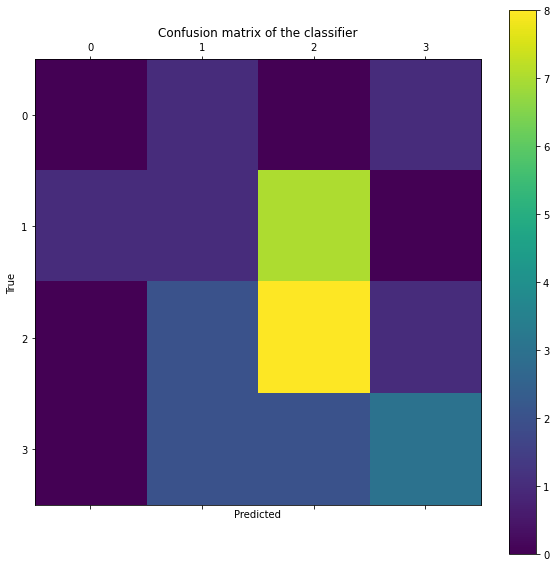

In [263]:
from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3']
cm = confusion_matrix(y1_test, y1_predict)
# print(cm)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()